# Learning goals
After this week's lesson you should be able to:
- Perform overlay operations such as union and intersect
- Check for containment or intersection between multiple geometries
- Find centroids and convex hulls 
- Find distances to points

This week's lessons are adapted from:
- [Automating GIS Processes Lesson 1](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-1/overview.html)
- [The Shapely Documentation](https://shapely.readthedocs.io/en/stable/manual.html)
- [Spatial Data Programming with Python](https://geobgu.xyz/)

In [1]:
import pandas as pd
import geopandas as gpd




# 1. Geometric Objects
There are three kinds of geometric objects: 
- **points**
- **lines**: Connecting points together creates a line
- **polygons**: Connecting lines in an enclosed area creates a polygon. 

These are all the different categories of possible geometric objects. 
<figure class="image">
<img src="https://autogis-site.readthedocs.io/en/latest/_images/simple-features_595x500px.svg" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
 <figcaption><center>(Figures by M. W. Toews; cf. Wikipedia’s article on GeoJSON)</figcaption>
</figure>

Let's look at some geometry objects.

## 1.1 Points
Points are represented by a single coordinate are defined using the `Point` class.


In [2]:
stations = gpd.read_file('Subway Stations.zip')


<AxesSubplot: >

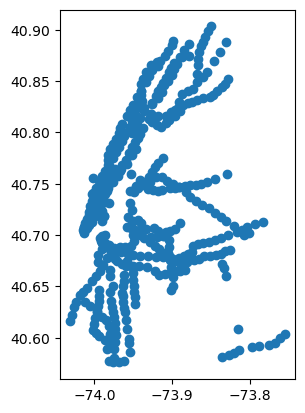

In [3]:
stations.plot()

In [4]:
stations.geom_type

0      Point
1      Point
2      Point
3      Point
4      Point
       ...  
468    Point
469    Point
470    Point
471    Point
472    Point
Length: 473, dtype: object

## 1.2 LineStrings
The `LineString` class is used to construct lines through a sequence of points. 

In [5]:
lines = gpd.read_file('Subway Lines.zip')


<AxesSubplot: >

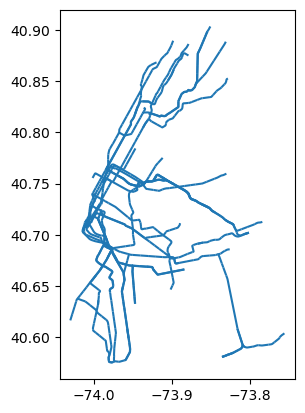

In [6]:
lines.plot()

In [7]:
lines.geom_type

0      LineString
1      LineString
2      LineString
3      LineString
4      LineString
          ...    
737    LineString
738    LineString
739    LineString
740    LineString
741    LineString
Length: 742, dtype: object

## 1.3 Polygons
From the above, we can see that a polygon is just one or more LinearRings (you can have a polygon with a hole in the middle, which would require two LinearRings). 

In [8]:
neighborhoods = gpd.read_file('NTA map.zip')


<AxesSubplot: >

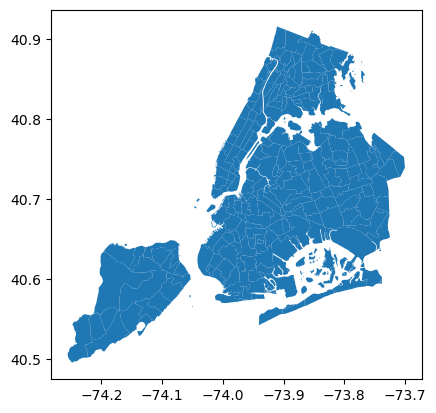

In [9]:
neighborhoods.plot()

In [10]:
neighborhoods.geom_type

0           Polygon
1           Polygon
2           Polygon
3           Polygon
4           Polygon
           ...     
190         Polygon
191         Polygon
192    MultiPolygon
193         Polygon
194    MultiPolygon
Length: 195, dtype: object

A MultiPolygon is a collection of Polygons. 

In [11]:
parks = gpd.read_file('Parks Properties_20240130.zip')

<AxesSubplot: >

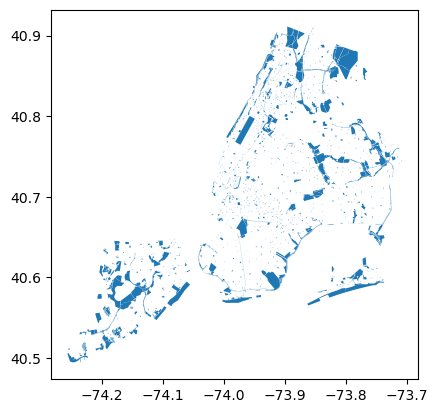

In [12]:
parks.plot()

# 2. Spatial Operations

`.boundary` returns the "border" of a geometry. If the geometry is a polygon, this method will return the border (a line), if the geometry is a line, this method will return a collection of points. If the geometry is a point, this method will return an empty result. 

<AxesSubplot: >

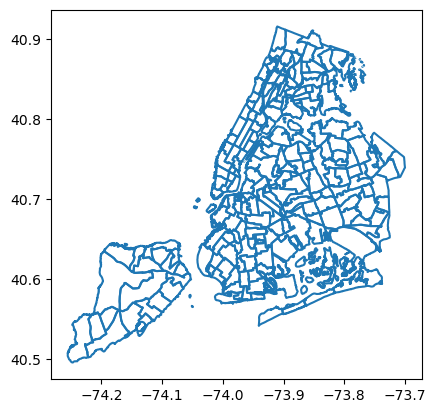

In [13]:
neighborhoods.boundary.plot()

`.centroid` returns the center point of an object. 

<figure class="image">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Triangle.Centroid.svg/440px-Triangle.Centroid.svg.png" alt="drawing" width="300" style="display: block; margin: 0 auto"/>
 <figcaption><center>(From Wikipedia)</figcaption>
</figure>


/var/folders/cy/x4wtz_6d12s786ynvlhf_sf00000gq/T/ipykernel_40506/1059327912.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighborhoods.centroid.plot()


<AxesSubplot: >

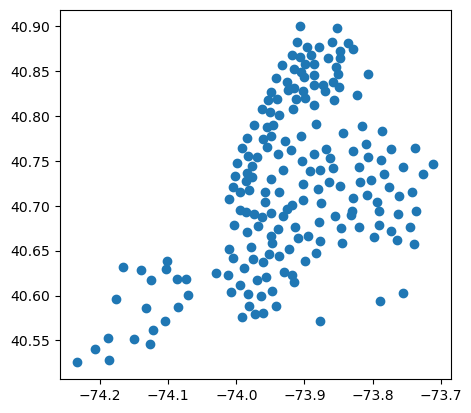

In [14]:
neighborhoods.centroid.plot()

`.buffer` returns the buffer of a geometry given a radius. 

/var/folders/cy/x4wtz_6d12s786ynvlhf_sf00000gq/T/ipykernel_40506/3795609091.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  neighborhoods.buffer(0.01).boundary.plot()


<AxesSubplot: >

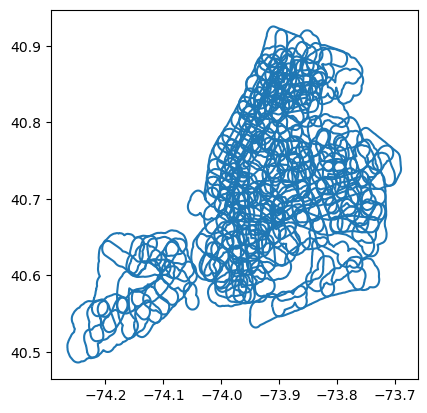

In [15]:
## I'm plotting the boundaries of the neighborhoods so you can see the buffer more easily. 
neighborhoods.buffer(0.01).boundary.plot()

`.dissolve` combines geometries that are touching. 

<AxesSubplot: >

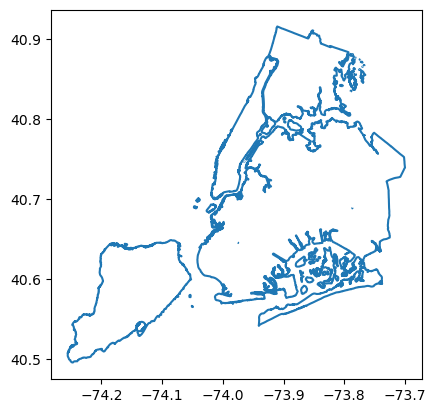

In [16]:
# Again, plotting teh boundaries so you can see the dissolve more easily.
neighborhoods.dissolve().boundary.plot()

You can also dissolve by a particular category

<AxesSubplot: >

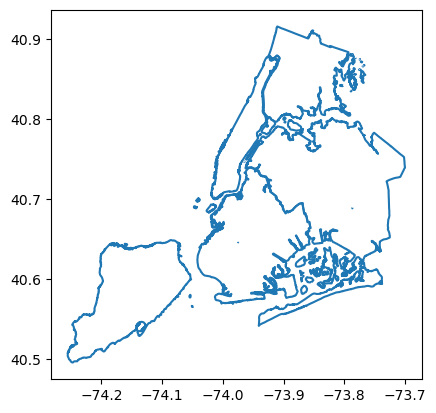

In [17]:
neighborhoods.dissolve(by='boroname').boundary.plot()

`.convexhull` The convex hull of a geometry is the smallest convex Polygon containing all the points in each geometry, unless the number of points in the geometric object is less than three.

<AxesSubplot: >

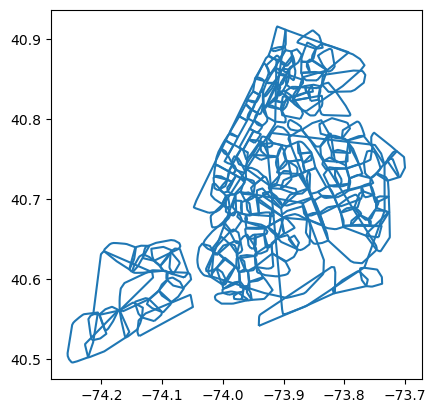

In [18]:
neighborhoods.convex_hull.boundary.plot()
# a convex hull is useful for finding the 

`.distance` Finds the distance between a point a the geometries in a geodataframe.

In [19]:
a_point_xy = pd.DataFrame({'longitude': [-73.971321], 'latitude':[40.776676] })
a_point = gpd.GeoDataFrame(a_point_xy, geometry=gpd.points_from_xy(a_point_xy.longitude, a_point_xy.latitude), crs='EPSG:4326')


stations.to_crs(3857).distance(a_point.to_crs(3857).iloc[0].geometry)

0       7195.247996
1       9090.894644
2       2602.385545
3      14080.720392
4      18515.676984
           ...     
468    29288.586793
469     4642.210546
470     1849.488156
471     2183.267293
472     2919.882213
Length: 473, dtype: float64

# 3. Spatial Overlay operations
These types of operations allow us to create new geometries from two geodataframes based on certain ways of overlaying these two. 
![](https://geopandas.org/en/stable/_images/overlay_operations.png)

<AxesSubplot: >

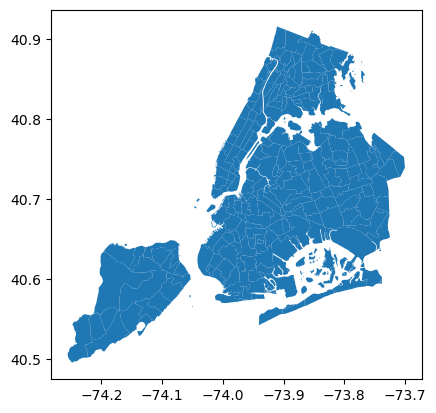

In [20]:
neighborhoods.plot()

<AxesSubplot: >

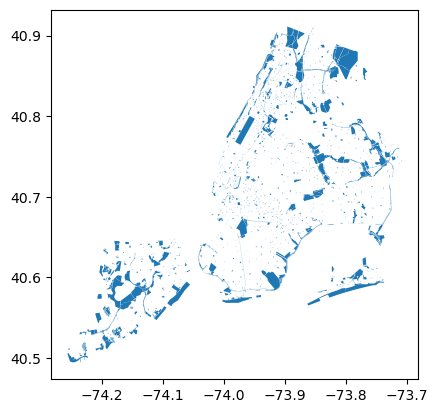

In [21]:
parks.plot()

<AxesSubplot: >

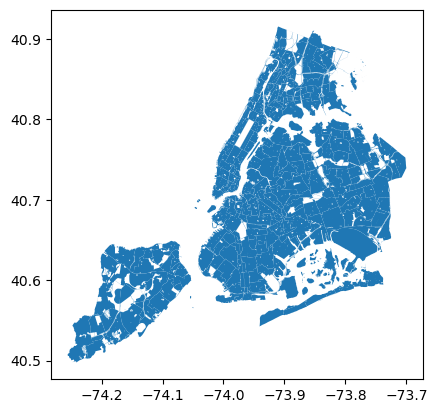

In [22]:
neighborhoods.overlay(parks,how='difference').plot()

# 3. Exercises - Areas not accessible by subway
Here, we are going to look at neighborhoods that are not accesible to a subway station

In [ ]:
stations = gpd.read_file('Subway Stations.zip')


Let's look at the first 5 rows

In [ ]:
# Insert your code here


Create a 800 meter buffer around each station. If it didn't work, remember that buffers use the unit of measurement for the current CRS your geodataframe is in!

In [ ]:

stations_buffer = # Insert your code here

## We have to convert the buffer to a GeoDataFrame for the next step. 
## We also have to convert the buffer to the same crs as the neighborhoods.
stations_buffer = gpd.GeoDataFrame(geometry=stations_buffer).to_crs(4326)

Plot the results

In [ ]:
# Insert your code here

In [ ]:
stations_buffer.plot()

Now plot a spatial overlay so you can get the areas in each neighborhood not covered by a station buffer. 

In [ ]:
# Insert your code here
